In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Let's start!

First we need some points we need an animation curve, or, to be more precise some values of an animation curve that we want to interpolate. I first create those points: "t" is the frames where there are keys, "y" is the values at those frames.

For the type of t and y, I used a Python library called numpy which is great for manipulating arrays. Just think of it as a list. t is the list of the frames, y the list of the values. Then, I plot it so that you see what it means.

For more experimentation, you can replace False by True for randomValue. Rather than using the t, y as I chose, it will generate them randomly!

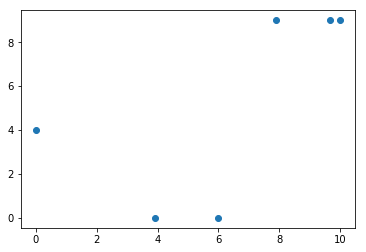

In [2]:
randomValue = True #put True if you want to try with random values for t and y

if randomValue:
    size = 4 #size+2 is the number of points for interpolation! We always need those two points: one at the beginning, one at the end
    t = np.random.rand(size)*10 #we get random values of t between 0 and 10 (use randint for integer values)
    t = np.append(t,np.array([0,10])) #we add 0 and 10
    t = np.sort(t) #we sort our array (required for the scipy functions that we use later on)
    y = np.random.randint(10,size=size+2) #we generate our value for y: integer values between 0 and 10 (use rand for non integer values)
else:
    t = np.array([0,1,3,5,7,9,12,14]) #we fix the values of t ourself
    y = np.array([3,1,2,2,2,8,0,2]) #we fix the values of y ourself

plt.plot(t,y,'o') #we create a plot, representing our (t,y) as points
plt.show() #we display the plot

In [3]:
#this part is not important, it is just helper variables to plot things
tmin=np.amin(t) #we're getting the minimum t
tmax=np.amax(t) #we're getting the maximum t
tcontinuous = np.linspace(tmin,tmax,(tmax-tmin)*100) #auxiliary array that we use for plotting functions

C:\Users\bacta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


# Linear Interpolation

So let's first try the most basic scheme: trying to linearly interpolate between our points!

Linear Interpolation is merely drawing a segment between two consecutive points! As you can see on the next example, linearly interpolating create a decent figure that approximates well the curve as we imagine it, but there is a huge problem: it is not smooth! The tangents break (on our points, right and left tangents do not coincide!) and that will create unnatural motion (breaking tangents mean non continuous speed which means infinite acceleration on those points. And infinite acceleration doesn't happen frequently in real life)

I created a function drawInterpolation that has:
inputs: 
    - kind: the type of interpolation (used by scipy function interp1d). Merely use drawInterpolation('linear') for linear interpolation or drawInterpolation('cubic') for spline interpolation
    - frames: the frames where our attributes are keyed (if you put nothing, the function takes as input the array t that we created earlier)
    - values: the value of the attributes at those frames (if you put nothing, the function takes as input the array y that we created earlier)

output:
    - None. Just plot the interpolated curve that goes through our points with the interpolation we specified

In [4]:
def drawInterpolation(kind,frames=t,values=y):
    f = interpolate.interp1d(frames,values,kind) #we create the interpolation function with the corresponding interpolation
    plt.plot(t,y,'o',tcontinuous,f(tcontinuous),'-') #we plot it on top of the points
    plt.show() #we display

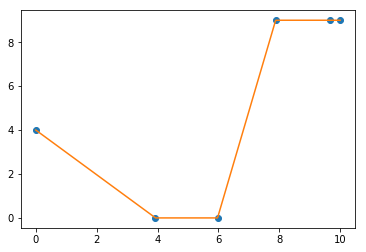

In [5]:
drawInterpolation('linear') #let's use our function to plot the linear interpolated curve

# Towards smooth interpolation

Now, I will present a few interpolation techniques and discuss briefly how they work and why they are good/not good

## Polynomial interpolation

One of the most simple interpolation that comes to mind is the polynomial interpolation. Indeed, there is a math theorem that says that if we have a finite number of points (that do not share the same absciss), then it always exists a polynom that pass by all these points. A polynom is a function that we can study really well as it has nice properties and it is smooth!

Let's check how it goes

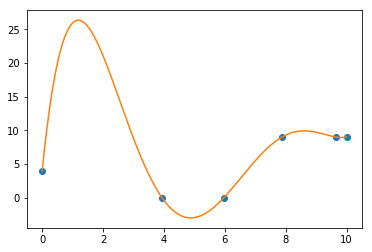

In [6]:
polynomial = interpolate.BarycentricInterpolator(t, y) #we compute the polynomial interpolator with scipy

plt.plot(t, y, 'o', tcontinuous, polynomial(tcontinuous), '-') #we plot it
plt.show() #we display the plot

As you can see (if you kept the original example, but you might see it often on other random examples), the result is smooth and goes through our points but behaves like crazy. It is due to the fact that the interpolation polynomial is a polynom of very high degree and is not designed to stick to the curve; it just makes sure it goes through every point. If we interpolate like that, our animation clearly will not be good.

## Spline interpolation

Instead we can consider what we call 'Spline' Interpolation. There are two main kind of Spline, Cubic and Quadratic Splines (even though we can define other ones but they will not be interesting). As we saw earlier, the reasons the interpolation polynom does not behave well is because:
    - it is not a local but global
    - it is a high degree polynomial
    
To address this issue we construct a spline by just creating our interpolating function piecewise: we stick together multiple polynomials of degree 2 (for 'Quadratic Spline') of 3 (for 'Cubic Spline' which is the most used). Each polynomial will just have the mission to connect two points, so that it is local! We just have to add some constraints so that the tangents match on the interpolating points to make it smooth!

Let's see the result

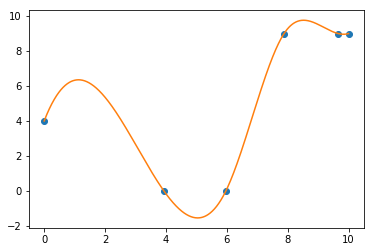

In [7]:
 drawInterpolation('cubic') #we use our function to draw the cubic spline interpolation

As you can see, the result is much better, but still not what we want. We see that our interpolation goes beyond our points, it 'overshoots' our control points! Even though it remains local, the fact that the tangent that we impose might not be good forces the curve to overshoot when changing the curvature (i.e when switching from increasing to decreasing) since the tangent is unlikely to be naturally flat.

Below is a method presented in the paper: "A new method of interpolation and smooth curve fitting based" by Hiroshi Akima that also uses polynomials of degree 3 but more 'cleverly' to achieve a much better interpolation! For more details check the original paper. The result is closer to what Maya proposes when applying the auto-spline method!

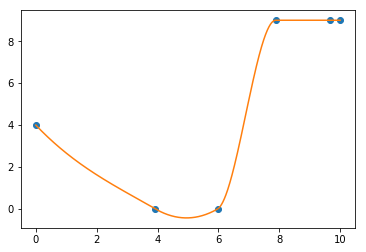

In [8]:
akima = interpolate.Akima1DInterpolator(t, y)

plt.plot(t, y, 'o', tcontinuous, akima(tcontinuous), '-')
plt.show()